In [1]:
import sys
import os
import glob
from os import listdir
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from time import time
import json
from pprint import pprint
import shutil

## Openpose auxiliary functions

In [62]:
# takes image, its name, output directory for a rendered file as arguments and applies the openpose library 
# for the image;
# image can be passed as a jpg/png file or as an array. In the latter case, input_type should be changed to 'array';

# net_resolutiion parameter, scale_number, scale_gap can be cahnged as well;
# net_resolution (default: “656x368”, numbers should be multiples of 16): determines size of a downscaled image passed to the net.
# If it is increased, the accuracy potentially increases. If it is decreased, the speed increases. 

# scale_number (default: 1): determines number of scales to average. What scales to use is determined by
# net_resolution described above and scale_gap.
# scale_gap (default: 0.299999):  determines scale gap between scales, it has no effect unless scale_number > 1.
# For example, scale_number = 4 at scale_gap = 0.25 means using net_resolution = 656x368 * [1, 0.75, 0.5, 0.25]. 
# Initial scale is always 1. 

# Finally, cahnge return_im to True if you desire to return a rendered image
def openpose_1_image(image, image_name, output_directory, input_type='image', net_resolution='"-1x368"', scale_number = 1, scale_gap = 0.3, return_im = False):
    temp_directory='./knapsack/openpose_1_image/'
    if input_type == 'array':
        image = Image.fromarray(image.astype('uint8'))   
        if image != 'RGB':
            image = image.convert('RGB')
    image.save(temp_directory + image_name)
    json_output = output_directory + 'json_files/'
    !./build/examples/openpose/openpose.bin --no_display --net_resolution $net_resolution --scale_number $scale_number --scale_gap $scale_gap --image_dir ./knapsack/openpose_1_image/ --write_images $output_directory --write_json $json_output
    os.remove(temp_directory + image_name)
    if return_im == True:
        im_out = Image.open(output_directory + image_name[:-4]+'_rendered.png')
        return im_out

In [8]:
# applies openpose library to a directory with images and calulates time spent per image
def openpose_directory(input_directory='./knapsack/Initial_frames/', output_directory='./knapsack/rendered_images/', net_resolution = '"-1x368"', scale_number = 4, scale_gap = 0.25):
    t = []
    num_images = len(listdir(input_directory))
    for filename in listdir(input_directory):
        im = Image.open(input_directory+filename)
        t_0 = time()
        openpose_1_image(im, filename, output_directory, input_type='image', net_resolution=net_resolution, scale_number=scale_number, scale_gap = scale_gap, return_im=False)
        t.append(time()-t_0)
    return np.sum(t)/num_images

In [9]:
# apply openpose to a directory and print spent time
t = time()
openpose_directory(input_directory='./knapsack/Initial_images_2/', net_resolution='"384x240"', scale_number=1, scale_gap=0.1)
print('time = ', time() - t, 's')

Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.527285 seconds.
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.532131 seconds.
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.339696 seconds.
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.239915 seconds.
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of th

## Openpose rendering with various parameters

### various net_resolution parameters:

In [31]:
# change net_resolution in a certain range and apply openpose:

h_0, h_1, h_step = 16, 25, 4
w_0, w_1, w_step = 10, 21, 5
height, width = 16*np.arange(h_0, h_1, h_step), 16*np.arange(w_0, w_1, w_step)
time_spent = np.zeros((height.shape[0], width.shape[0]))
rendered_images = np.zeros((height.shape[0], width.shape[0], 480, 720, 3))
for h_ind, h in enumerate(height):
    for w_ind, w in enumerate(width):
        net_res = str(h) + 'x' + str(w)
        im = Image.open('./knapsack/Initial_frames/filename005.jpg')
        t = time()
        im_out = openpose_1_image(im, 'filename005.jpg', './knapsack/rendered_images/', input_type='image', net_resolution=net_res, return_im=True)
        time_spent[h_ind, w_ind] = time() - t
        rendered_images[h_ind, w_ind, :, :, :] = im_out

Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.359572 seconds.
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.680251 seconds.
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.430206 seconds.
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.495337 seconds.
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of th

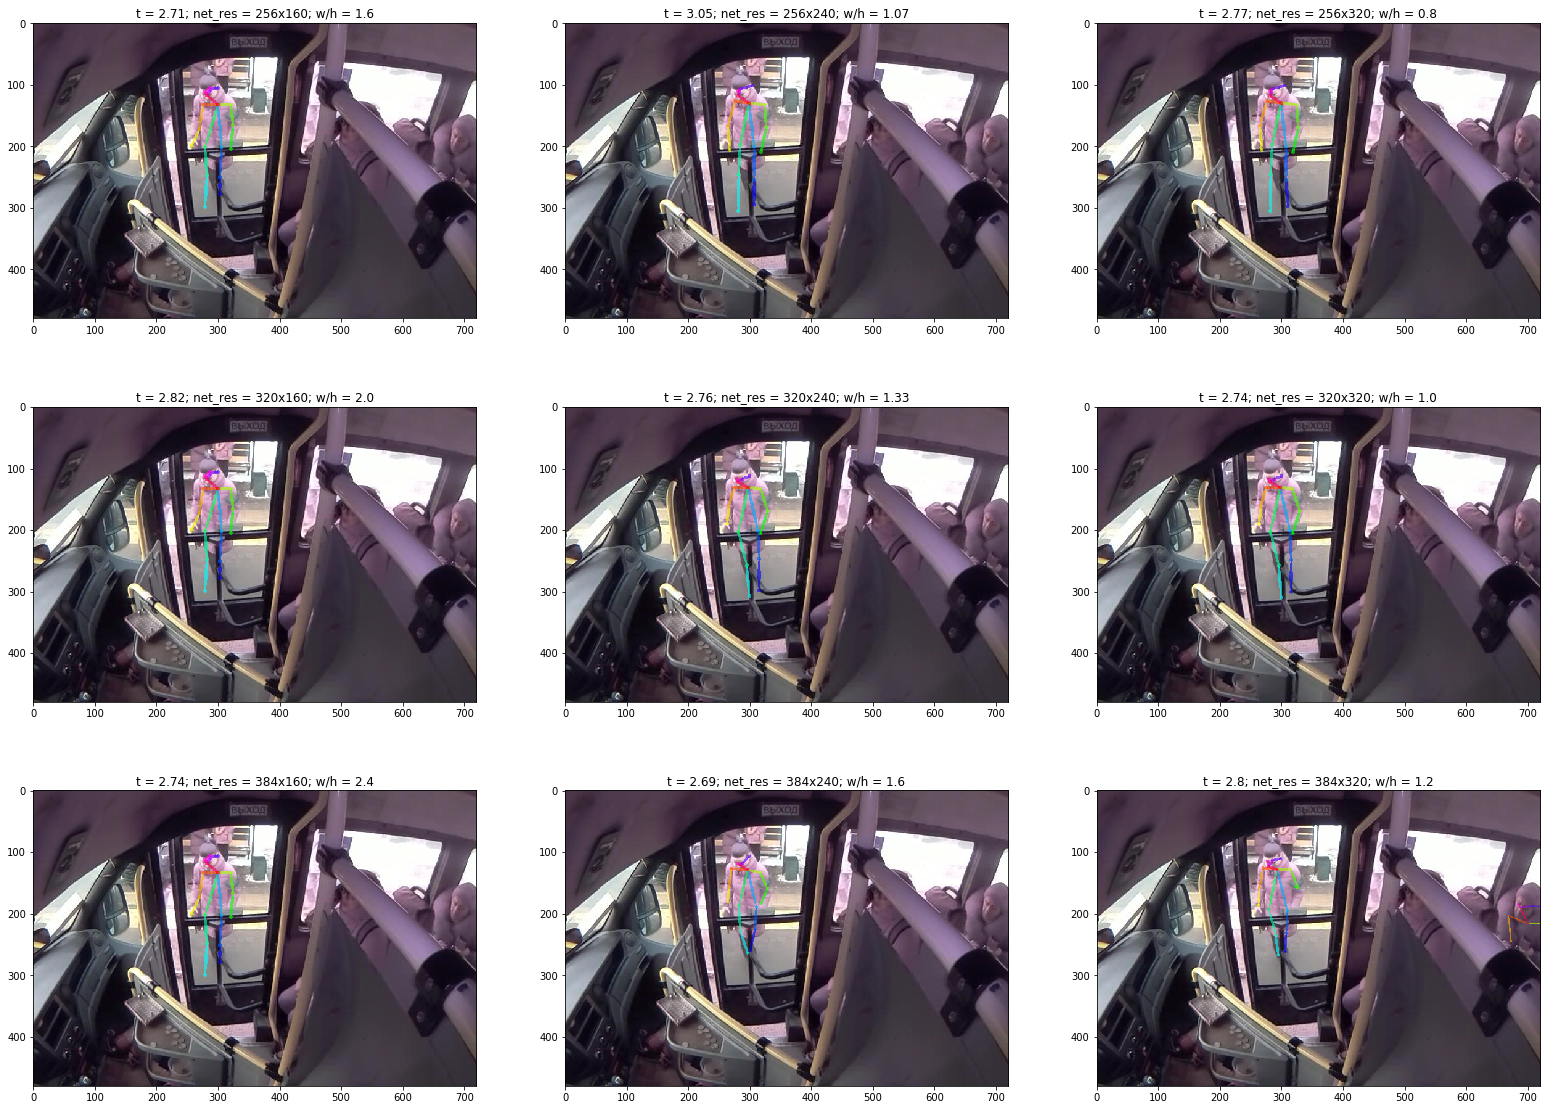

In [38]:
# show rendered images and spent time:

plt.figure(figsize=(27,20))
for h_ind, h in enumerate(height):
    for w_ind, w in enumerate(width):
        net_res = str(h) + 'x' + str(w)
        index = h_ind*width.shape[0]+w_ind
        plt.subplot(height.shape[0], width.shape[0], index+1)
        plt.title('t = ' + str(round(time_spent[h_ind, w_ind],2)) + '; net_res = ' + net_res + '; w/h = ' + str(round(h/w, 2)))
        plt.imshow(rendered_images[h_ind, w_ind, :, :, :].astype('uint8'))
plt.show()

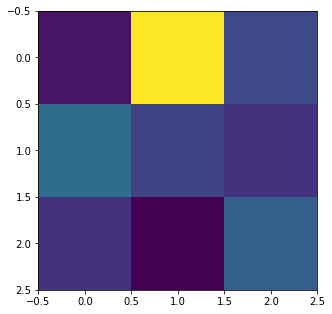

In [118]:
# spent time heatmap
plt.figure(figsize=(5,7))
plt.imshow(time_spent)

Different net_resolution ranges were tested. Eventually, net_resolution = 384x240 provides accuracy close to the best achievable and works faster than any other configuration with the same level of accuracy.

### various scale parameters:

Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.400551 seconds.
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 3.724180 seconds.


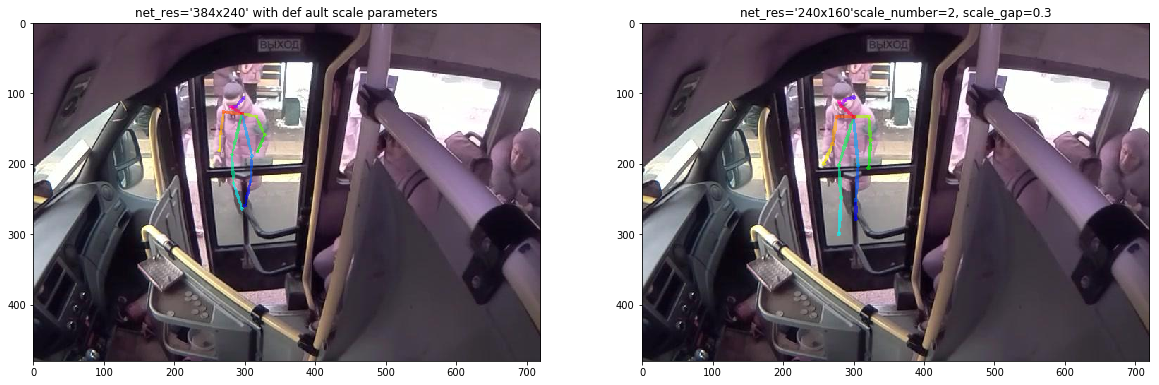

default time 2.740204334259033 non-default time 4.5079474449157715


In [64]:
im = Image.open('./knapsack/Initial_frames/filename005.jpg')
net_res_def = "'384x240'"
t = time()
# default scale_number and scale_gap:
im_out_def = openpose_1_image(im, 'filename005.jpg', './knapsack/rendered_images/', input_type='image', net_resolution=net_res_def, return_im=True)
t_def = time() - t

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('net_res='+str(net_res_def)+' with default scale parameters')
plt.imshow(im_out_def)

scale_num = 2
scale_gap = 0.3
net_res = "'240x160'"
t = time()
im_out = openpose_1_image(im, 'filename005.jpg', './knapsack/rendered_images/', input_type='image', net_resolution=net_res, scale_number=scale_num, scale_gap=scale_gap, return_im=True)

plt.subplot(1,2,2)
plt.title('net_res='+str(net_res)+'scale_number='+str(scale_num)+', scale_gap='+str(scale_gap))
plt.imshow(im_out)
plt.show()

print('default time', t_def, 'non-default time', time()-t)

Different combinations of scale_parameters and net_resolutions were tested, but either accuracy or timing is worse than when using net_resolution=384x240 with default scale parameters.

# Image merging

In [119]:
# merge images im1, im2. 'hor' for horizontal merging, 'ver' for vertical
def merge_images(im1, im2, mode='hor'):
    if mode == 'hor':
        total_width = im1.size[0] + im2.size[0]
        max_height = max(im1.size[1], im2.size[1])

        new_im = Image.new('RGB', (total_width, max_height))

        x_offset = 0
        for im in [im1, im2]:
            new_im.paste(im, (x_offset,0))
            x_offset += im.size[0]
    elif mode == 'ver':
        total_height = im1.size[1] + im2.size[1]
        max_width = max(im1.size[0], im2.size[0])

        new_im = Image.new('RGB', (max_width, total_height))

        x_offset = 0
        for im in [im1, im2]:
            new_im.paste(im, (0,x_offset))
            x_offset += im.size[1]
    return new_im

In [70]:
# merge images im1, im2, im3, im4; im1, im2 in the first row, while im3 and im4 in the second one.
def merge_4images(im1, im2, im3, im4):
    im1 = merge_images(im1, im2, mode = 'hor')
    im2 = merge_images(im3, im4, mode = 'hor')
    new_im = merge_images(im1, im2, mode = 'ver')
    return new_im

Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.405436 seconds.
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.386025 seconds.
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.395963 seconds.
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.489868 seconds.
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of th

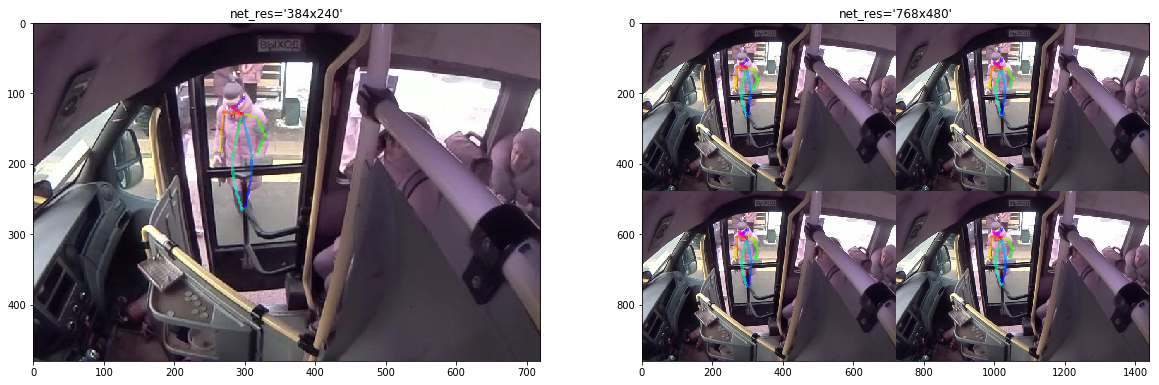

time for 4 images one-by-one 10.9994215965271 time for 4 merged images 3.2397851943969727


In [76]:
# Compare timing for 4 images rendered one by one and one image with 4 images merged (with 2 times increased 
# net_reolution to keep the same accuracy)

im = Image.open('./knapsack/Initial_frames/filename005.jpg')
net_res_def = "'384x240'"
t = time()
for _ in range(4):
    im_out_def = openpose_1_image(im, 'filename005.jpg', './knapsack/rendered_images/', input_type='image', net_resolution=net_res_def, return_im=True)

t_def = time() - t

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('net_res='+str(net_res_def))
plt.imshow(im_out_def)

im = merge_4images(im,im,im,im)
net_res = "'768x480'"
t = time()
im_out = openpose_1_image(im, 'filename005.jpg', './knapsack/rendered_images/', input_type='image', net_resolution=net_res, return_im=True)
t_merged = time() - t
plt.subplot(1,2,2)
plt.title('net_res='+str(net_res))
plt.imshow(im_out)
plt.show()

print('time for 4 images one-by-one', t_def, 'time for 4 merged images', t_merged)

## Knapsack packing

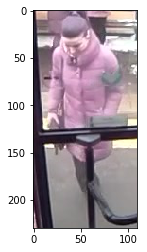

In [78]:
# crop out image from a frame
cut = np.array(im.convert())[80:310,240:350]
cut = Image.fromarray(cut)
plt.imshow(cut)

In [79]:
# knapsack packing class

#!/usr/bin/env python
"""
Pack multiple images of different sizes into one image.

Based on S W's recipe:
http://code.activestate.com/recipes/442299/
Licensed under the PSF License
"""
import argparse
import glob
from PIL import ImageChops

try: import timing # Optional, http://stackoverflow.com/a/1557906/724176
except: None

class PackNode(object):
    """
    Creates an area which can recursively pack other areas of smaller sizes into itself.
    """
    def __init__(self, area):
        #if tuple contains two elements, assume they are width and height, and origin is (0,0)
        if len(area) == 2:
            area = (0,0,area[0],area[1])
        self.area = area

    def __repr__(self):
        return "<%s %s>" % (self.__class__.__name__, str(self.area))

    def get_width(self):
        return self.area[2] - self.area[0]
    width = property(fget=get_width)

    def get_height(self):
        return self.area[3] - self.area[1]
    height = property(fget=get_height)

    def insert(self, area):
        if hasattr(self, 'child'):
            a = self.child[0].insert(area)
            if a is None: 
                return self.child[1].insert(area)
            return a

        area = PackNode(area)
        if area.width <= self.width and area.height <= self.height:
            self.child = [None,None]
            self.child[0] = PackNode((self.area[0]+area.width, self.area[1], self.area[2], self.area[1] + area.height))
            self.child[1] = PackNode((self.area[0], self.area[1]+area.height, self.area[2], self.area[3]))
            return PackNode((self.area[0], self.area[1], self.area[0]+area.width, self.area[1]+area.height))

## openpose applied to bounding boxes packed into one image:

In [80]:
# take array of images and bboxes for each image and return array of cropped frames and array with information
# of what initial image each frame belongs to
def get_cropped_frames(image_array, bboxes):
    cropped_frames = []
    info_array = []
    for index, im in enumerate(image_array):
        bbs_im = bboxes[index]
        for bb in bbs_im:
            cropped_frames.append(image_array[index].crop(bb))
            info_array.append([index, bb])
    return cropped_frames, info_array

In [81]:
# pack cropped frames into an image of size 720x480 using the packing class described above
def pack_cropped_frames(cropped_frames, info_array):
    
    packed_images = []
    size = 720, 480
    format = 'RGB'
    sort = True
    
    # sort cropped_frames:
    if sort:
        cropped_frames = [(i, cropped_frames[i]) for i in range(len(cropped_frames))]
        cropped_frames = sorted(cropped_frames, key = lambda x: x[1].size[1], reverse=True)
        # get new_indices and sorted array of cropped_frames
        new_ind = [cropped_frames[i][0] for i in range(len(cropped_frames))]
        cropped_frames = [cropped_frames[i][1] for i in range(len(cropped_frames))]
        # modify info_array:
        info_array = [info_array[i] for i in new_ind]
    
    print ("Create tree")
    tree = PackNode(size)
    image = Image.new(format, size)
    
    #insert each image into the PackNode area
    for i, img in enumerate(cropped_frames):
        #print (img.size)
        uv = tree.insert(img.size)
        if uv is None: 
            #print('#', i, ', with size', img.size, "can't be packed; new packed_image will be created")
            image = image.crop(box=image.getbbox())
            packed_images.append(image)
            #print ("Create tree")
            tree = PackNode(size)
            image = Image.new(format, size)
            #print (img.size)
            uv = tree.insert(img.size)
        image.paste(img, uv.area)
        info_array[i].append(len(packed_images)) # ID of a packed_image
        info_array[i].append(uv.area) # position of cropped frame in a packed_image
    
    image = image.crop(box=image.getbbox())
    packed_images.append(image) 
    
    return packed_images, info_array

In [82]:
# rewritten function openpose_1_image. The idea is the same: take image, its name, output directories and net_res 
# parameter, and apply openpose to the image
def openpose_image(image, image_name, json_output='./knapsack/json_output/', output_directory=None, net_resolution='"-1x368"'):
    
    pn_w, pn_h = 384, 240
    w, h = image.size[0], image.size[1]
    nr0, nr1 = int((pn_w*(w/720)//16+1)*16), int((pn_h*(h/480)//16+1)*16)
    net_resolution = str(nr0) + "x" + str(nr1)
    
    temp_directory='./knapsack/openpose_1_image/'
    image.save(temp_directory + image_name)
    
    if output_directory is not None:
        !./build/examples/openpose/openpose.bin --no_display --net_resolution $net_resolution --image_dir ./knapsack/openpose_1_image/ --write_images $output_directory --write_json $json_output
    else:
        !./build/examples/openpose/openpose.bin --no_display --net_resolution $net_resolution --image_dir ./knapsack/openpose_1_image/ --write_images $output_directory --write_json $json_output
    
    os.remove(temp_directory + image_name)

In [83]:
# apply openpose to frames with specified bounding boxes
def apply_openpose_to_frames_with_bbs(frames, bbs, net_resolution):
    # crop frames from large frames according to bounding boxes
    cropped_frames, info_array = get_cropped_frames(image_array=frames, bboxes=bbs)
    # pack cropped frames into images "packed_images"
    packed_images, info_array = pack_cropped_frames(cropped_frames, info_array)
    # remove files from directories:
    shutil.rmtree('./knapsack/rendered_images/')
    os.makedirs('./knapsack/rendered_images/')
    shutil.rmtree('./knapsack/json_output/')
    os.makedirs('./knapsack/json_output/')
    # apply openpose to packed_images
    for index, p_im in enumerate(packed_images):
        img_name = (7-len(str(index)))*'0'+str(index)+'.png'
        openpose_image(p_im, img_name, output_directory='./knapsack/rendered_images/', net_resolution=net_resolution)
        json_f_name = './knapsack/json_output/'+ (7-len(str(index)))*'0'+str(index) + '_keypoints.json'
        with open(json_f_name) as f:
            data = json.load(f)
    return cropped_frames, packed_images, info_array

In [84]:
# read json_output files, discard unnecessary info and save the rest to info_array
def get_openpose_coords(frames, bbs, json_output_folder='knapsack/json_output/', net_resolution='"384x160"'):
    
    cropped_frames, packed_images, info_array = apply_openpose_to_frames_with_bbs(frames, bbs, net_resolution)
    for num_p_im, f_name in enumerate(sorted(listdir(json_output_folder))):
        with open(json_output_folder+f_name) as f:
            data = json.load(f)
        for person in data['people']:
            for label in person:
                joint_coord = person[label]
                if label == 'pose_keypoints' and joint_coord!=[]:
                    
                    rng = range(len(joint_coord)//3)
                    x_coord = [joint_coord[i*3] for i in rng if joint_coord[i*3+2]>0.6]
                    if x_coord == []: break
                    x_av = np.average(x_coord) 
                    y_coord = [joint_coord[i*3+1] for i in rng if joint_coord[i*3+2]>0.6]
                    y_av = np.average(y_coord)
                    
                    # coord of cropped frames in a packed_image
                    crf_coord_in_pim = [(i,info_array[i][3]) for i in range(len(info_array)) if info_array[i][2]==num_p_im]
                    frame_id = crf_coord_in_pim[0][0]
                    for i, c in crf_coord_in_pim:
                        if x_av >= c[0] and x_av <= c[2] and y_av >= c[1] and y_av <= c[3]:
                            frame_id = i
                            break
                    #print(frame_id, info_array[frame_id])
                    info_array[frame_id].append(joint_coord)
    return info_array

In [85]:
# take frames and bounding boxes in these frames as arguments and
# return openpose keypoints (coordinates) in correspondence to coordinate systems of initial images
def output_openpose_coords(frames, bbs, json_output_folder='knapsack/json_output/', net_resolution='"720x480"'):
    
    info_array = get_openpose_coords(frames=frames, bbs=bbs, net_resolution=net_resolution)
    num_of_frames = len(frames)
    output = [[] for _ in range(num_of_frames)]
    for ind in range(len(info_array)):
        cr_fr = info_array[ind]
        im_num = cr_fr[0]
        x_bb_rel_to_im, y_bb_rel_to_im = cr_fr[1][0], cr_fr[1][1]
        x_fr_rel_to_pim, y_fr_rel_to_pim = cr_fr[3][0], cr_fr[3][1]
        for j in range(4, len(cr_fr)):
            array = list(cr_fr[j])
            #print(x_bb_rel_to_im, y_bb_rel_to_im)
            #print(x_fr_rel_to_pim, y_fr_rel_to_pim)
            for i in range(0,len(array), 3):
                array[i] = array[i]+x_bb_rel_to_im-x_fr_rel_to_pim
            for i in range(1,len(array), 3):
                array[i] = array[i]+y_bb_rel_to_im-y_fr_rel_to_pim
            output[im_num].append(array)
            
    return output

In [86]:
# check that coordinates returned by the above function are indeed on correct positions
# (visually it can be seen that red points are placed exactly at elbows, knees, pupils, etc.)
def depict_points(frames, positions):
    for ind, frame in enumerate(frames):
        for bb in positions[ind]:
            plt.imshow(frame)
            #print(bb)
            ind = [j for j in range(0,len(bb), 3) if bb[j]>0 and bb[j+1]>0]
            x = [bb[j] for j in ind]
            y = [bb[j+1] for j in ind]
            plt.scatter(x,y,s=10, c='r')
            plt.show()     

## Apply output_openpose_coords function for some artificially generated data:

In [100]:
# img array
im = Image.open('./knapsack/Initial_frames/filename005.jpg')
img_array = [im for _ in range(8)]

In [115]:
# random bounding boxes:
np.random.seed(8)
num_cuts = 8
w_0, h_0 = 200, 90
w_1, h_1 = 370, 330
bbs = [[() for _ in range(2)] for _ in range(4)]
for i in range(num_cuts):
    #d1, d2 = int(100*(np.random.rand()-0.2)), int(100*(np.random.rand()-0.8))
    bbs[i//2][i%2]=(int(w_0), int(h_0), w_1, h_1)
    #print(i,i//2,i%2)

Create tree
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.505667 seconds.
2.884253978729248 s


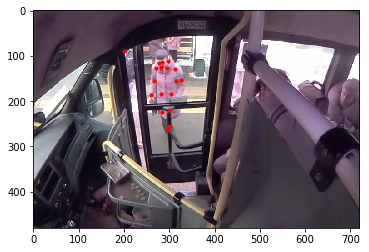

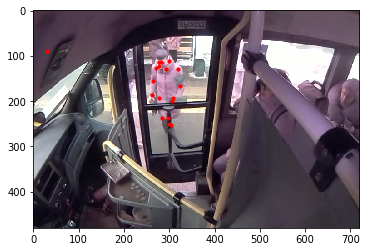

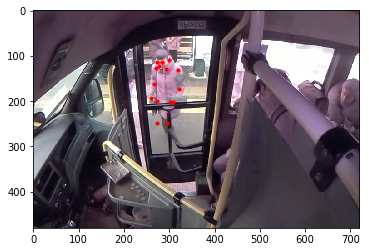

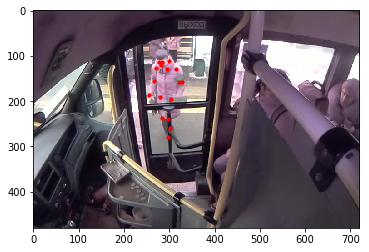

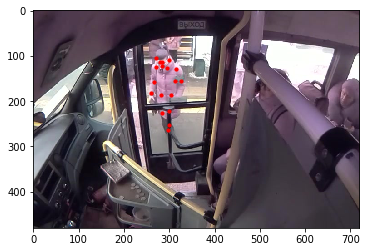

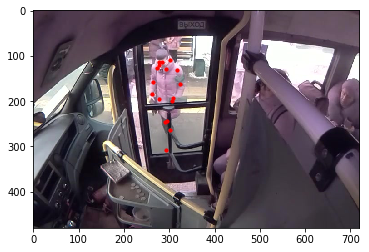

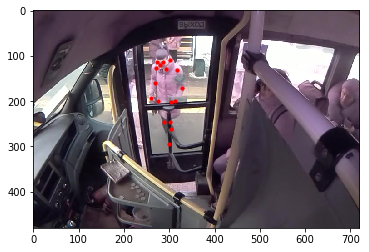

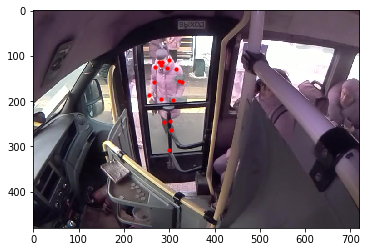

In [116]:
t = time()
output = output_openpose_coords(img_array, bbs)
print(time()-t, 's')
depict_points(img_array, positions=output)

#### 2.88s spent

red points are placed correctly on joints. The function was well tested for various configurations and proved to work right.

### Compare times for rendering 8 images one by one and for rendering one fixed-size image with cropped-out frames in it:

Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.416829 seconds.
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.648601 seconds.
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.494064 seconds.
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Starting thread(s)
Real-time pose estimation demo successfully finished. Total time: 2.437860 seconds.
Starting pose estimation demo.
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of th

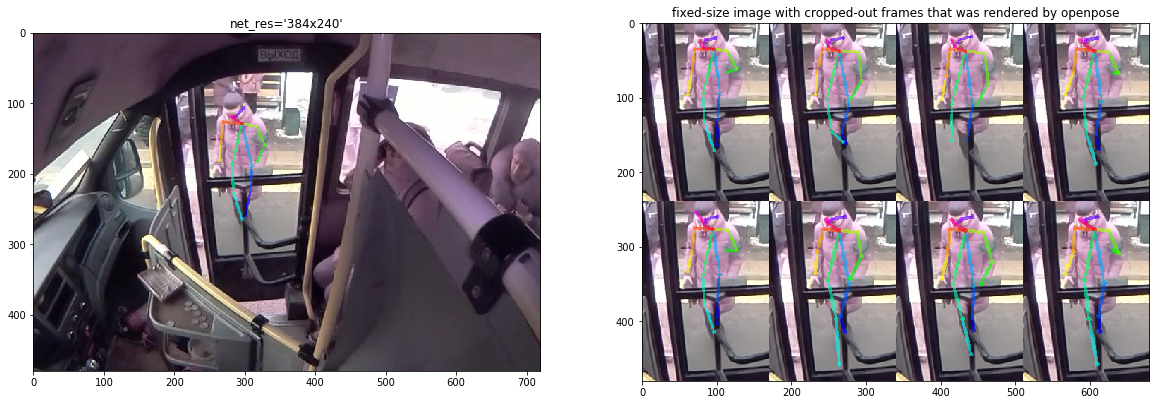

time for 8 images one-by-one 22.44866418838501 time for 1 image with cropped-out frames = 2.88s


In [117]:
im = Image.open('./knapsack/Initial_frames/filename005.jpg')
net_res_def = "'384x240'"
t = time()
for _ in range(8):
    im_out_def = openpose_1_image(im, 'filename005.jpg', './knapsack/rendered_images/', input_type='image', net_resolution=net_res_def, return_im=True)

t_def = time() - t

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('net_res='+str(net_res_def))
plt.imshow(im_out_def)

im = Image.open('knapsack/rendered_images/0000000_rendered.png')
plt.subplot(1,2,2)
plt.title('fixed-size image with cropped-out frames that was rendered by openpose, net_res=384x240')
plt.imshow(im)
plt.show()

print('time for 8 images one-by-one', t_def, 'time for 1 image with cropped-out frames = 2.88s')

In [122]:
22.449/2.88

7.794791666666668

As can be seen from the test, this function provides the result almost 8 times faster than if images were rendered one by one without crops!